# Experimentation with Prime Generation and Factorization

## Prime Generation
I will write out several prime generation algorithms so I can compare their efficiency.
### Sieve of Eratosthenes
I found this idea somewhere online a while ago. The idea is to do the sieve of Eratosthanes while keeping the list of composites as small as possible to save memory.

In [2]:
from __future__ import print_function
from sys import getsizeof, stderr
from itertools import chain
from collections import deque
try:
    from reprlib import repr
except ImportError:
    pass

def total_size(o, handlers={}, verbose=False):
    """ Returns the approximate memory footprint an object and all of its contents.

    Automatically finds the contents of the following builtin containers and
    their subclasses:  tuple, list, deque, dict, set and frozenset.
    To search other containers, add handlers to iterate over their contents:

        handlers = {SomeContainerClass: iter,
                    OtherContainerClass: OtherContainerClass.get_elements}

    """
    dict_handler = lambda d: chain.from_iterable(d.items())
    all_handlers = {tuple: iter,
                    list: iter,
                    deque: iter,
                    dict: dict_handler,
                    set: iter,
                    frozenset: iter,
                   }
    all_handlers.update(handlers)     # user handlers take precedence
    seen = set()                      # track which object id's have already been seen
    default_size = getsizeof(0)       # estimate sizeof object without __sizeof__

    def sizeof(o):
        if id(o) in seen:       # do not double count the same object
            return 0
        seen.add(id(o))
        s = getsizeof(o, default_size)

        if verbose:
            print(s, type(o), repr(o), file=stderr)

        for typ, handler in all_handlers.items():
            if isinstance(o, typ):
                s += sum(map(sizeof, handler(o)))
                break
        return s

    return sizeof(o)

In [6]:
import pickle

def genPrimesErato(n):
    """
    Yields all primes strictly less than n.
    
    Args:
        n: (Strict) upper bound on the primes to generate
    """
    composites = dict()
    xs = []
    ys = []
    for i in range(2,n//2+1):
        if i not in composites:
            # Found a new prime
            yield i
            xs.append(i)
            ys.append(total_size(composites))
            
            # The smallest (new) composite divisible by i will be i^2.
            composites[i*i] = set([i])
        else:
            for j in composites[i]:
                # Extend each arithmetic sequence that includes i by one term
                nextMultiple = i + j
                if nextMultiple not in composites:
                    composites[nextMultiple] = set()
                composites[nextMultiple].add(j)
                
            # Save memory by forgetting composites we've already seen
            del composites[i]
    plt.plot(xs,ys)
    plt.show()

<IPython.core.display.Javascript object>


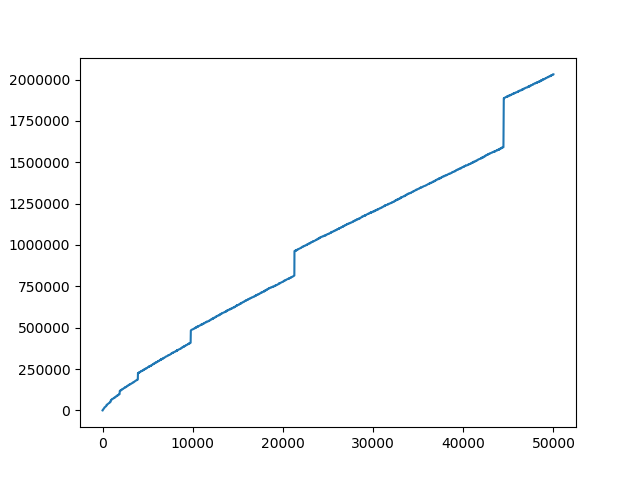

68.51275396347046


In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time
import math

ys = []
for i in range(5,6):
    start = time.time()
    primes = genPrimesErato(10**i)
    list(primes)
    print(time.time()-start)

### Sieve of Atkin
[See the wiki article](https://en.wikipedia.org/wiki/Sieve_of_Atkin). Supposed to be pretty fast. I am going to try to do my own implementation that can minimize memory space. Similar to the techniques above.

In [ ]:
# Generators for 

In [ ]:
def genPrimesAtkin(n):
    """
    Yields all primes strictly less than n
    
    Args:
        n: (Strict) upper bound on the primes to generate
    """
    
    isPrime = dict()
    for wheel in range(n//60+2):
        for rem in [1,7,11,13,17,19,23,29,31,37,41,43,47,49,53,59]:
            candidate = 60 * wheel + rem
            